# 20I0455, Sameer Tahir, CV A1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

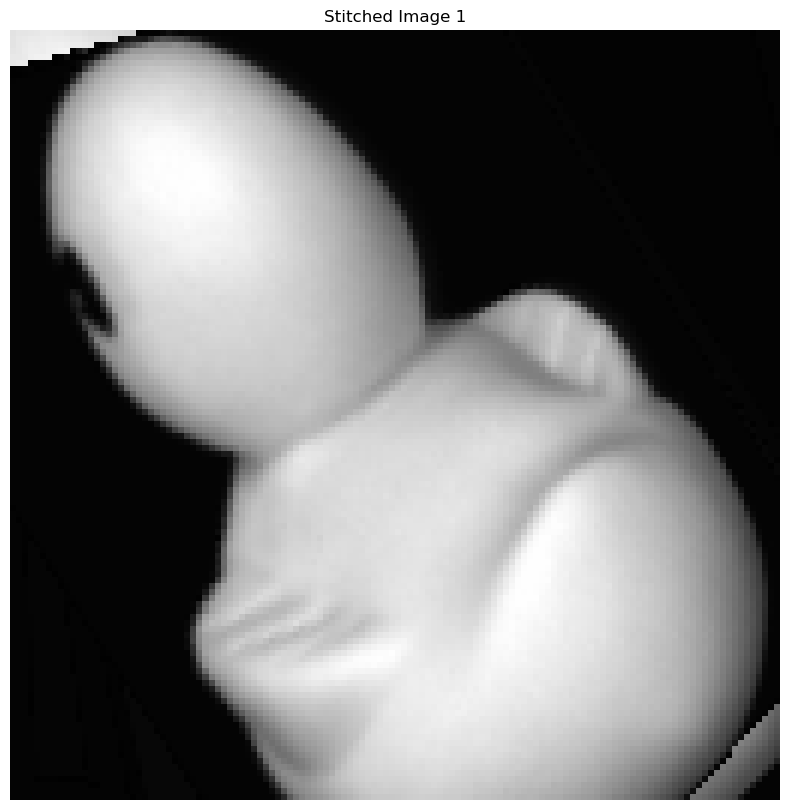

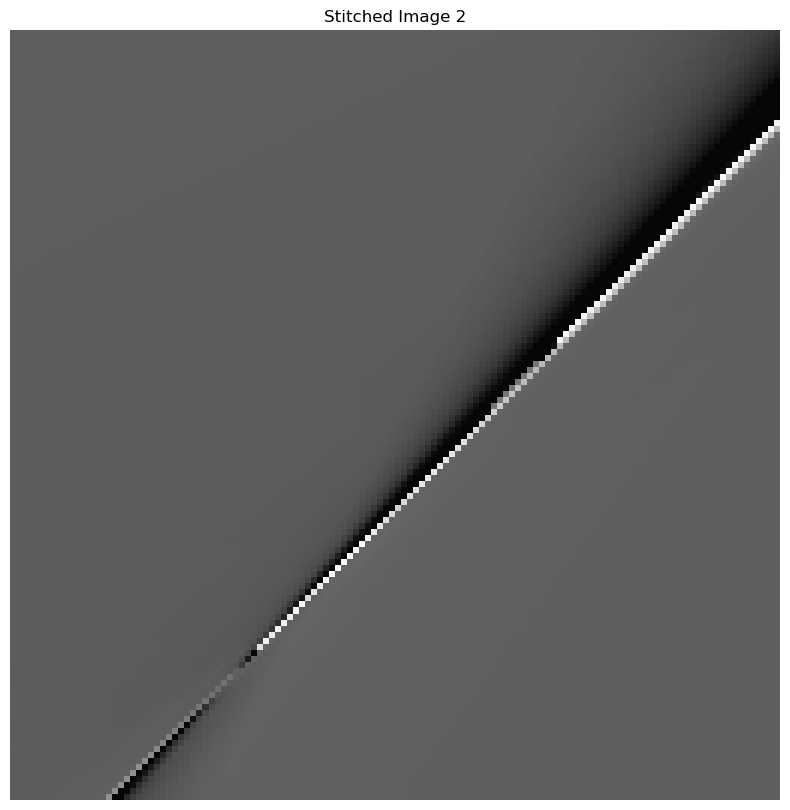

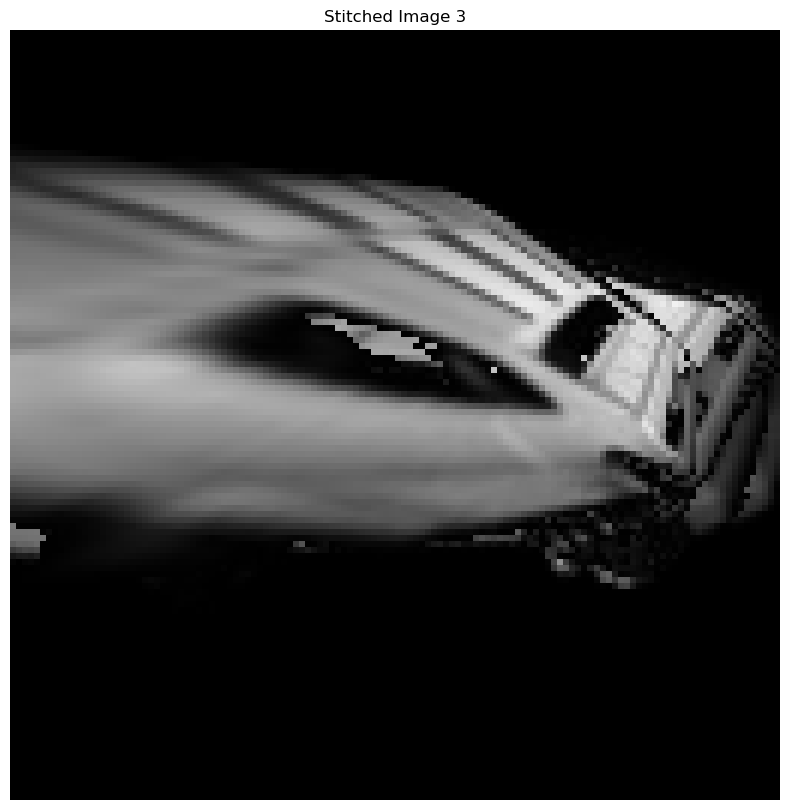

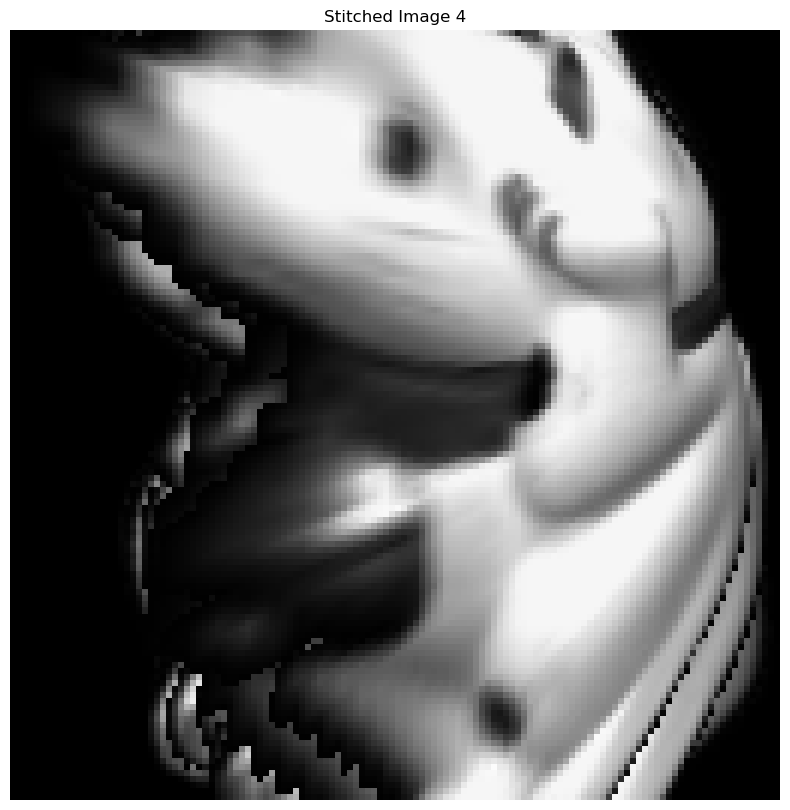

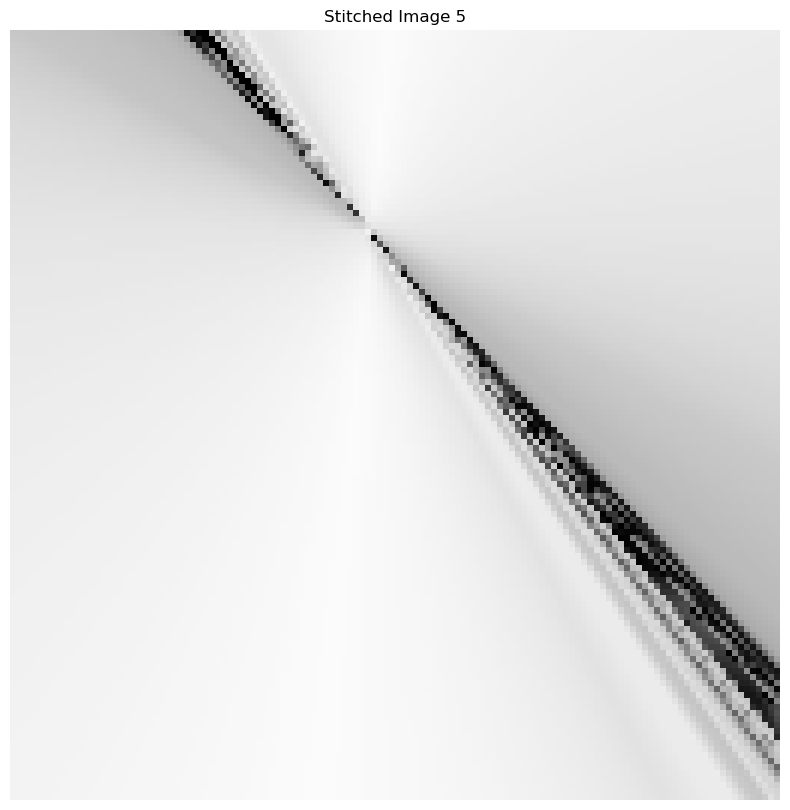

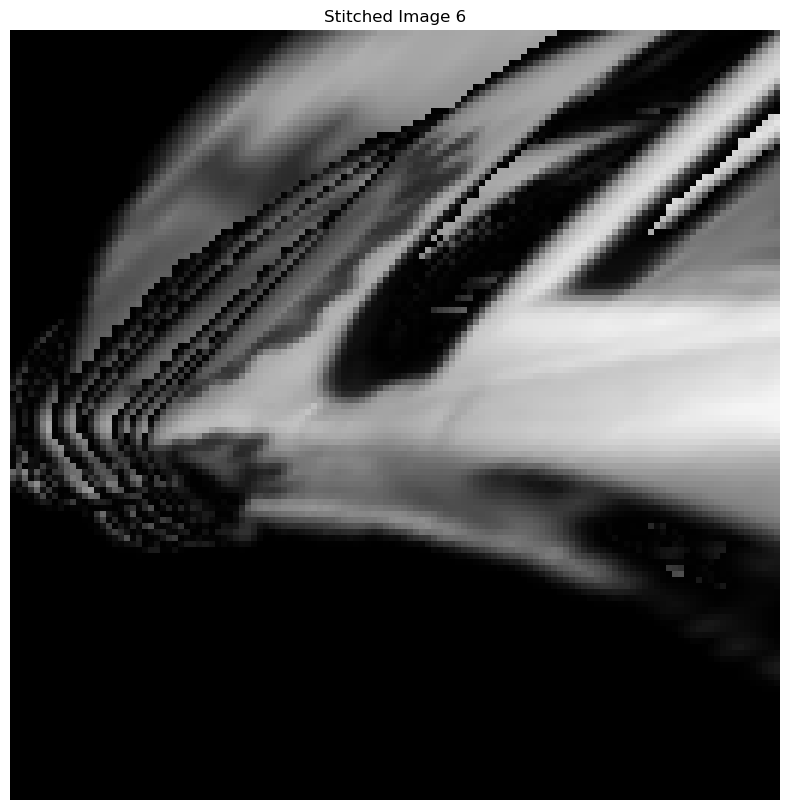

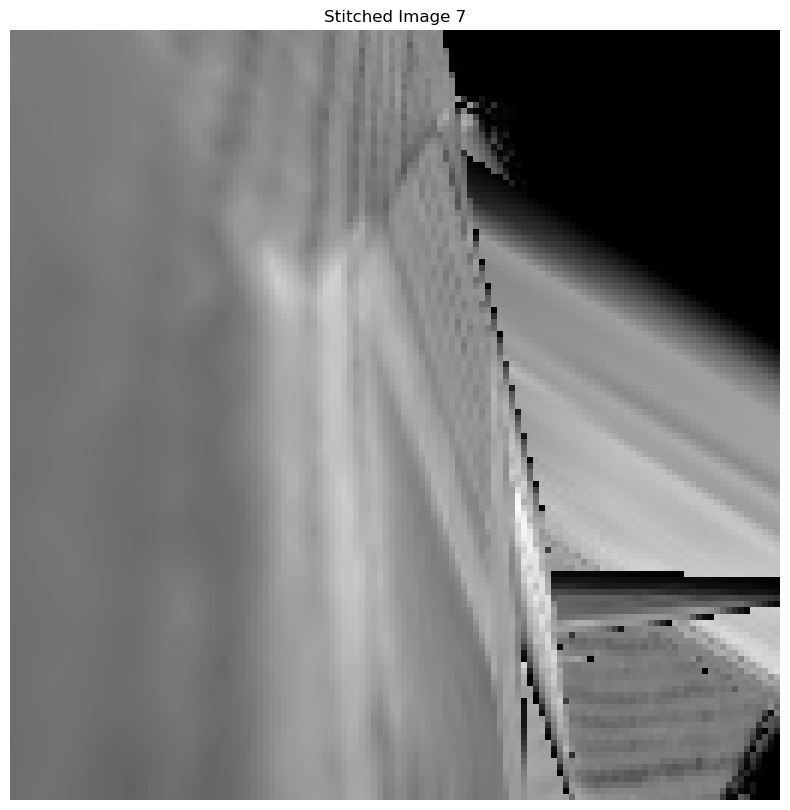

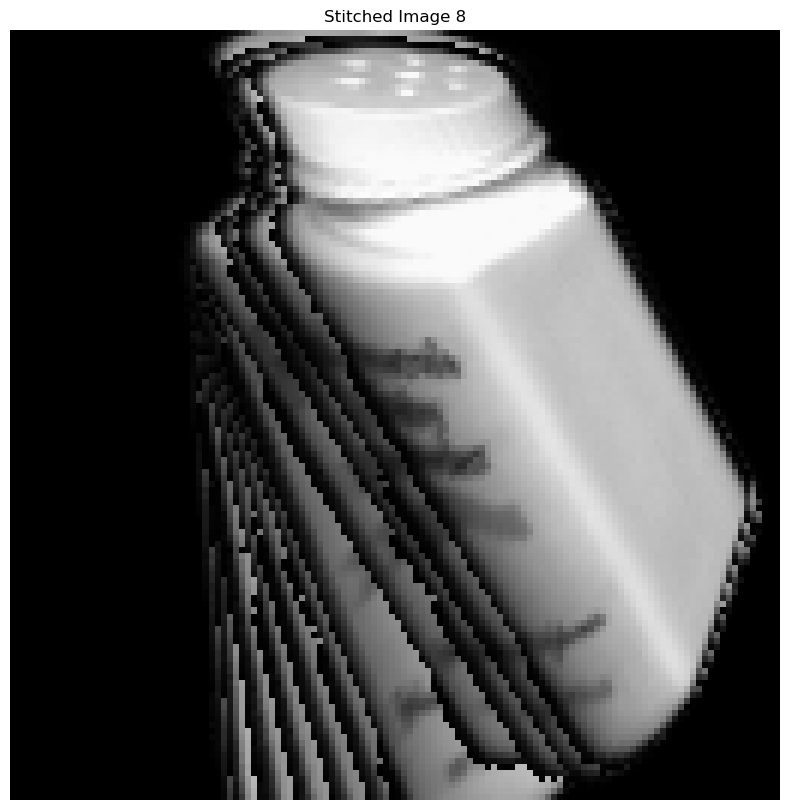

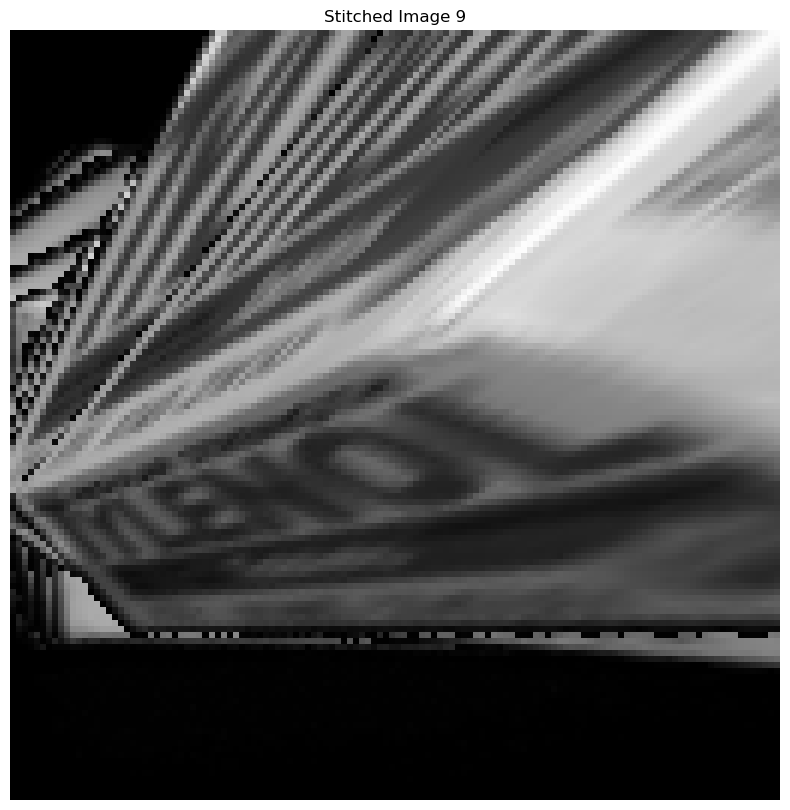

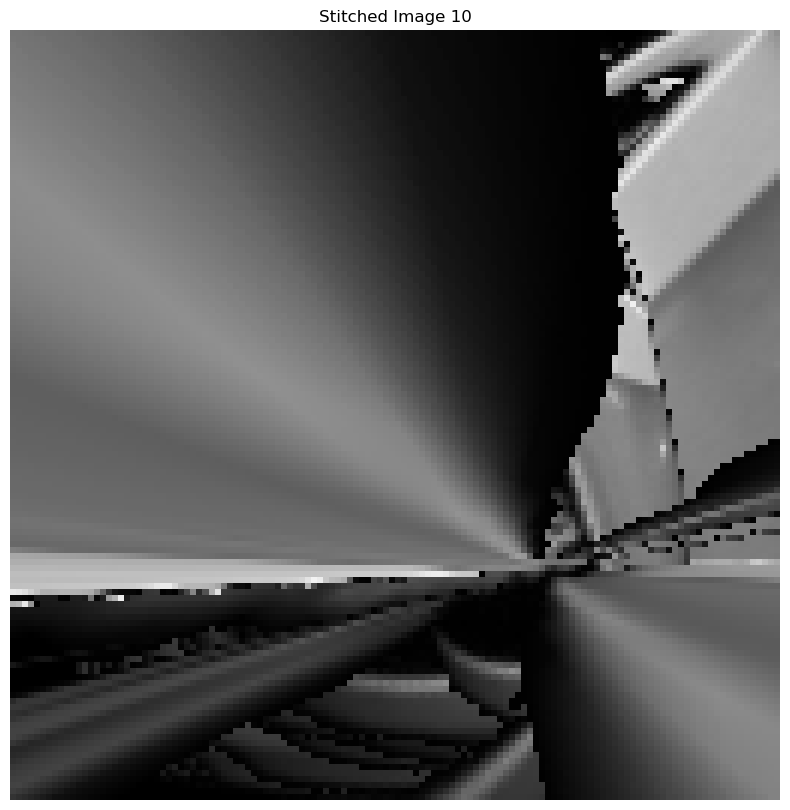

Broken at 6



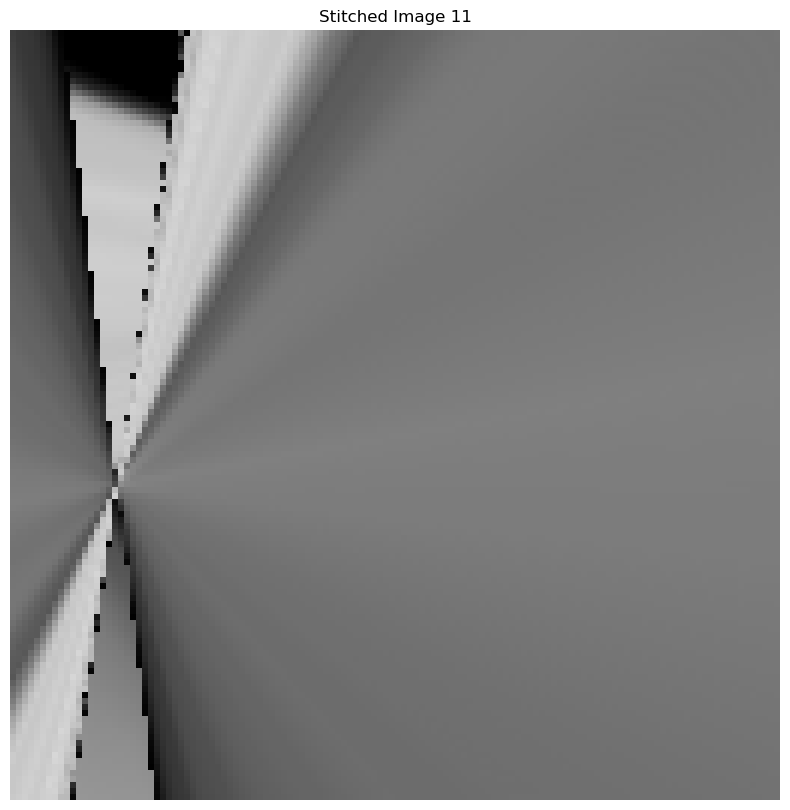

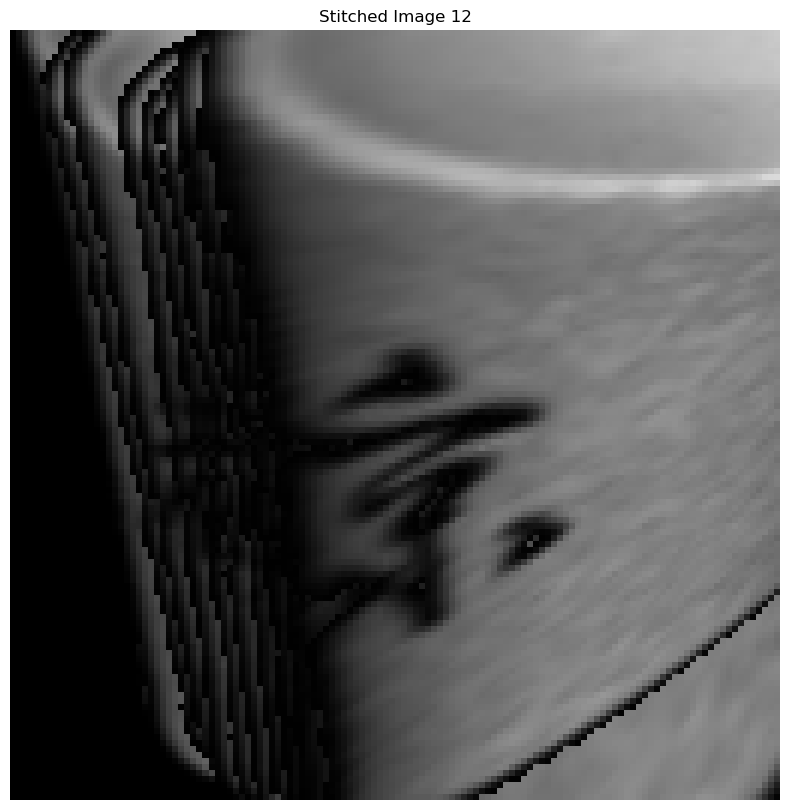

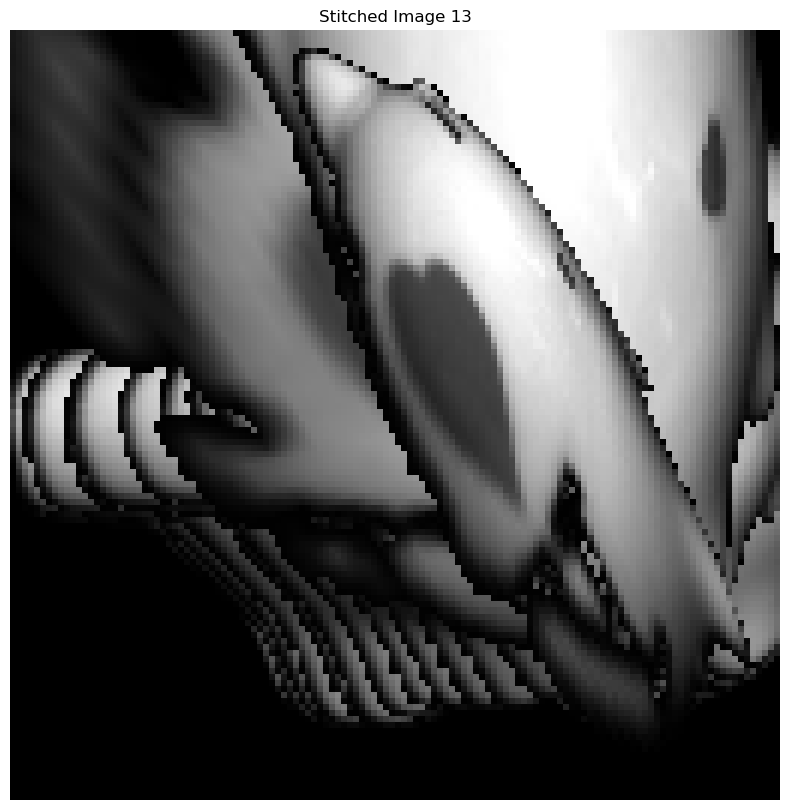

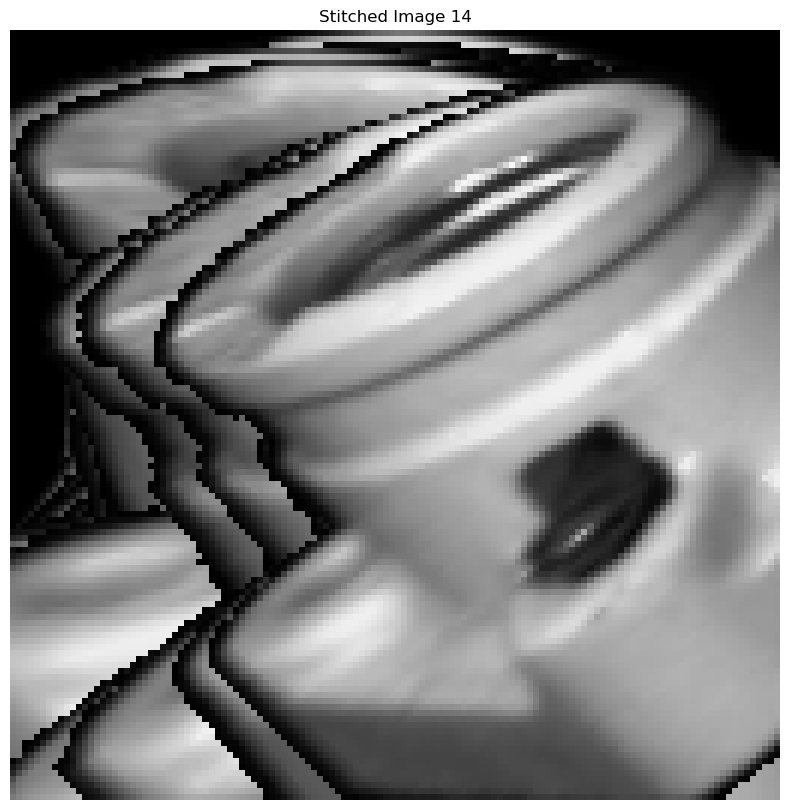

Broken at 12



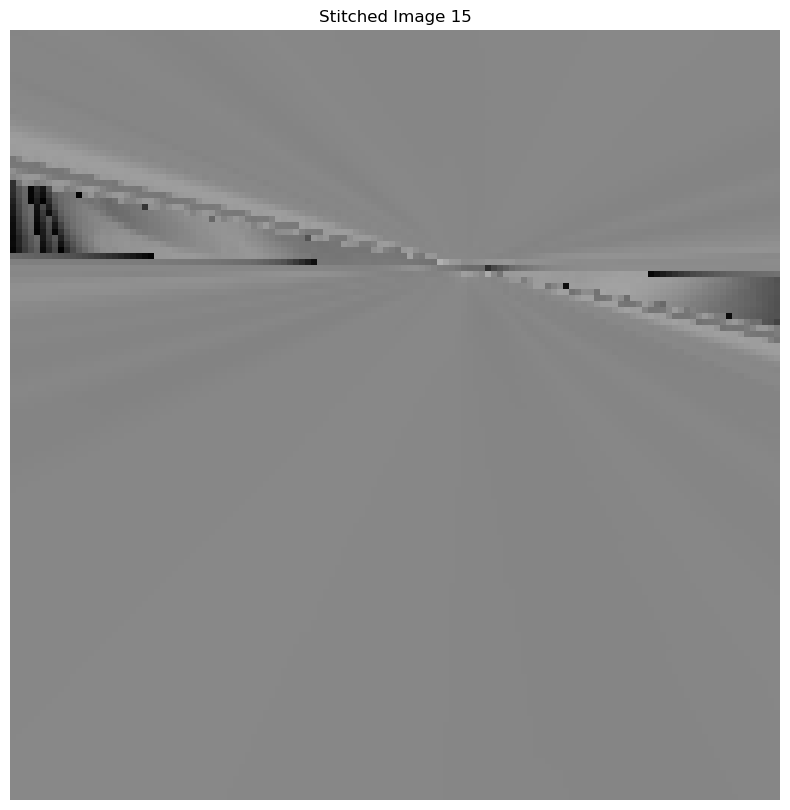

Broken at 12



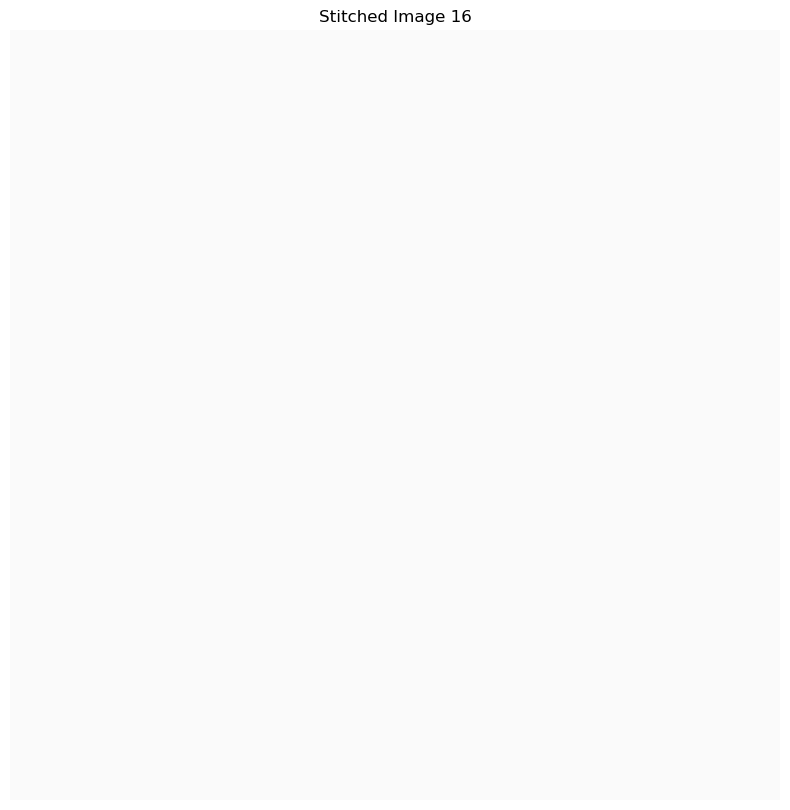

Broken at 10



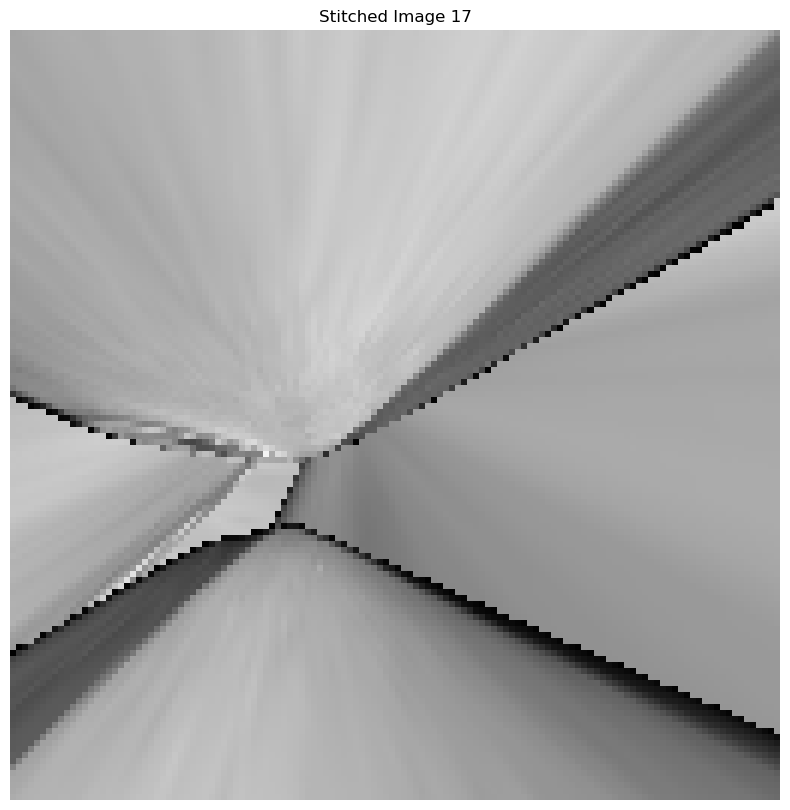

Broken at 7



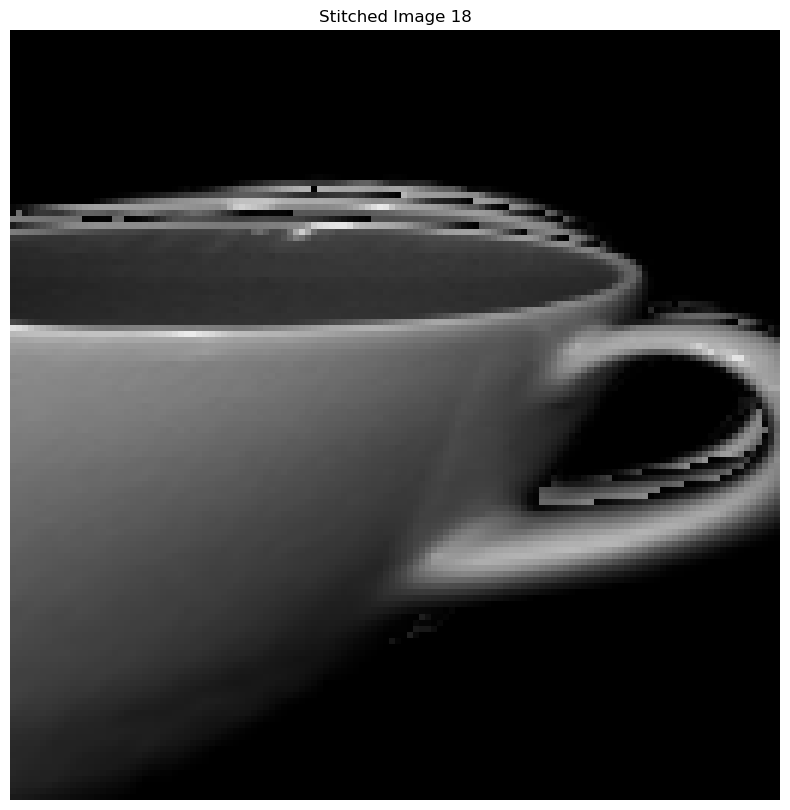

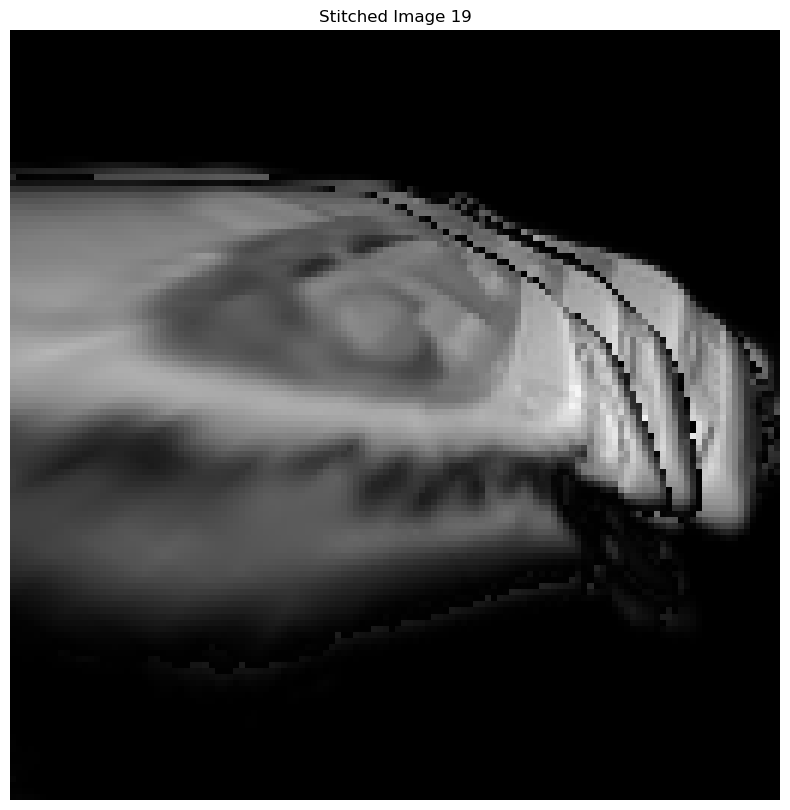

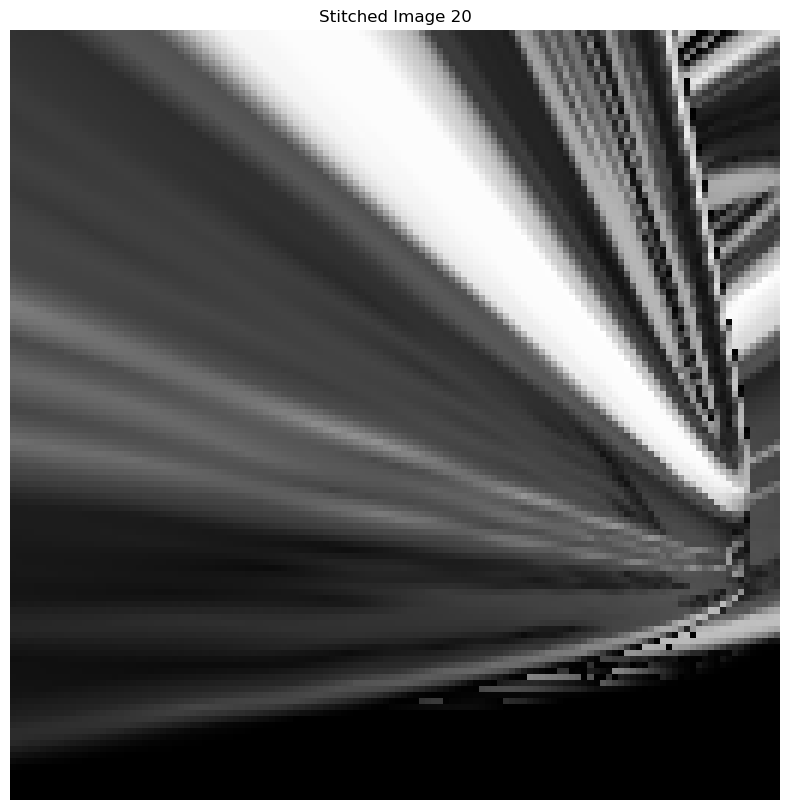

In [8]:
# Function to stitch two images based on keypoints and features
def stitch_images(img1, img2): 
    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors, using the masks
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Brute-Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Use the top 10 matches to find the homography
    top_matches = matches[:10]

    # Extract the keypoint locations for the top matches
    src_pts = np.float32([kp1[m.queryIdx].pt for m in top_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in top_matches]).reshape(-1, 1, 2)

    # Find the homography matrix
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Warp img2 to align with img1 based on the homography
    height, width, channels = img1.shape
    warped_img2 = cv2.warpPerspective(img2, H, (width, height))

    # Create a stitched image by blending or overlaying img1 and the warped img2
    stitched_image = np.where(warped_img2 > 0, warped_img2, img1)   
    return stitched_image



for s in range(1,21):
    
    image_list = []
    
    # Load images into the list (Adjust the path as needed)
    for i in range(0, 72):
        image_list.append(cv2.imread(rf"C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\coil-20\{s}\obj{s}__{i}.png"))
    
    stitched_image = image_list[0]
    
    # Loop through all remaining images
    for i in range(1, 15):
        # print(f"Stitching image {i} and {i+1}...")
        # Stitch the current image with the next one
        try:
            stitched_image = stitch_images(stitched_image, image_list[i])
        except:
            print(f"Broken at {i}\n")
            break


    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Stitched Image {s}')
    plt.axis('off')  # Hide axis
    plt.show()




# Question 2

### Part A

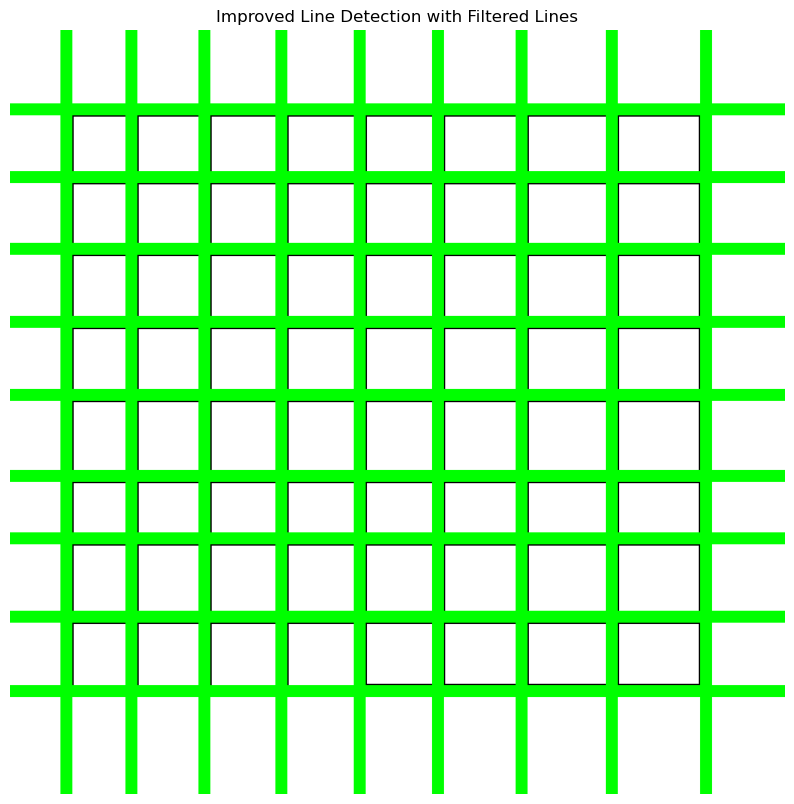

In [6]:
# Function to filter out close lines by checking the difference in rho and theta values
def filter_close_lines(lines, rho_threshold=15, theta_threshold=np.pi/90):
    filtered_lines = []
    
    for current_line in lines:
        rho, theta = current_line[0]
        too_close = False
        
        for previous_line in filtered_lines:
            prev_rho, prev_theta = previous_line[0]
            # Check if the current line is too close to an already selected line
            if abs(rho - prev_rho) < rho_threshold and abs(theta - prev_theta) < theta_threshold:
                too_close = True
                break
        
        if not too_close:
            filtered_lines.append(current_line)
    
    return filtered_lines

# Load the chessboard image
# image_path = '/mnt/data/image.png'
image = cv2.imread(rf'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\chess.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply edge detection using Canny
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Use Hough Line Transform with finer resolution and lower threshold
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Filter out the close lines
if lines is not None:
    lines = filter_close_lines(lines)

# Draw the filtered lines on the original image
image_with_lines = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 8)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Improved Line Detection with Filtered Lines')
plt.axis('off')
plt.show()


### Part B

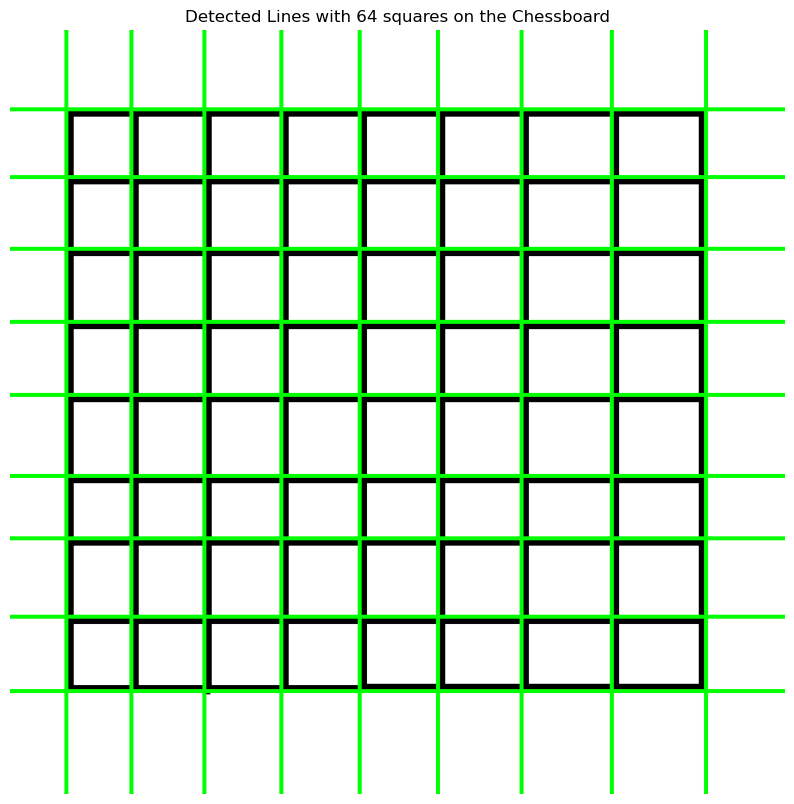

64

In [49]:
horizontal_lines = []
vertical_lines = []

for line in lines:
    rho, theta = line[0]
    if np.pi / 2 - 0.1 <= theta <= np.pi / 2 + 0.1:  # vertical lines (theta close to 90 degrees)
        vertical_lines.append(line)
    elif theta <= 0.1 or theta >= np.pi - 0.1:  # horizontal lines (theta close to 0 or 180 degrees)
        horizontal_lines.append(line)

# Sort lines by their rho values to make sure they're ordered from left to right (for vertical) and top to bottom (for horizontal)
vertical_lines = sorted(vertical_lines, key=lambda x: x[0][0])
horizontal_lines = sorted(horizontal_lines, key=lambda x: x[0][0])

# Calculate the number of squares by counting the intersections
num_squares = (len(horizontal_lines) - 1) * (len(vertical_lines) - 1)

# Visualize the lines on the image
image_with_lines = image.copy()
for line in vertical_lines + horizontal_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with horizontal and vertical lines
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title(f'Detected Lines with {num_squares} squares on the Chessboard')
plt.axis('off')
plt.show()

num_squares


### Part C

In [89]:

# chess pices
chess_pieces = {
    'black_bishop': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\black_bishop.png'),
    'black_king': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\black_king.png'),
    'black_knight': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\black_knight.png'),
    'black_pawn': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\black_pawn.png'),
    'black_queen': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\black_queen.png'),
    'black_rook': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\black_rook.png'),
    'white_bishop': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\white_bishop.png'),
    'white_king': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\white_king.png'),
    'white_knight': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\white_knight.png'),
    'white_pawn': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\white_pawn.png'),
    'white_queen': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\white_queen.png'),
    'white_rook': cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\white_rook.png')
}



[[(42, 60), (42, 111), (42, 165), (42, 220), (42, 275), (42, 336), (42, 383), (42, 442), (42, 498)], [(91, 60), (91, 111), (91, 165), (91, 220), (91, 275), (91, 336), (91, 383), (91, 442), (91, 498)], [(146, 60), (146, 111), (146, 165), (146, 220), (146, 275), (146, 336), (146, 383), (146, 442), (146, 498)], [(204, 60), (204, 111), (204, 165), (204, 220), (204, 275), (204, 336), (204, 383), (204, 442), (204, 498)], [(263, 60), (263, 111), (263, 165), (263, 220), (263, 275), (263, 336), (263, 383), (263, 442), (263, 498)], [(322, 60), (322, 111), (322, 165), (322, 220), (322, 275), (322, 336), (322, 383), (322, 442), (322, 498)], [(385, 60), (385, 111), (385, 165), (385, 220), (385, 275), (385, 336), (385, 383), (385, 442), (385, 498)], [(453, 60), (453, 111), (453, 165), (453, 220), (453, 275), (453, 336), (453, 383), (453, 442), (453, 498)], [(524, 60), (524, 111), (524, 165), (524, 220), (524, 275), (524, 336), (524, 383), (524, 442), (524, 498)]]


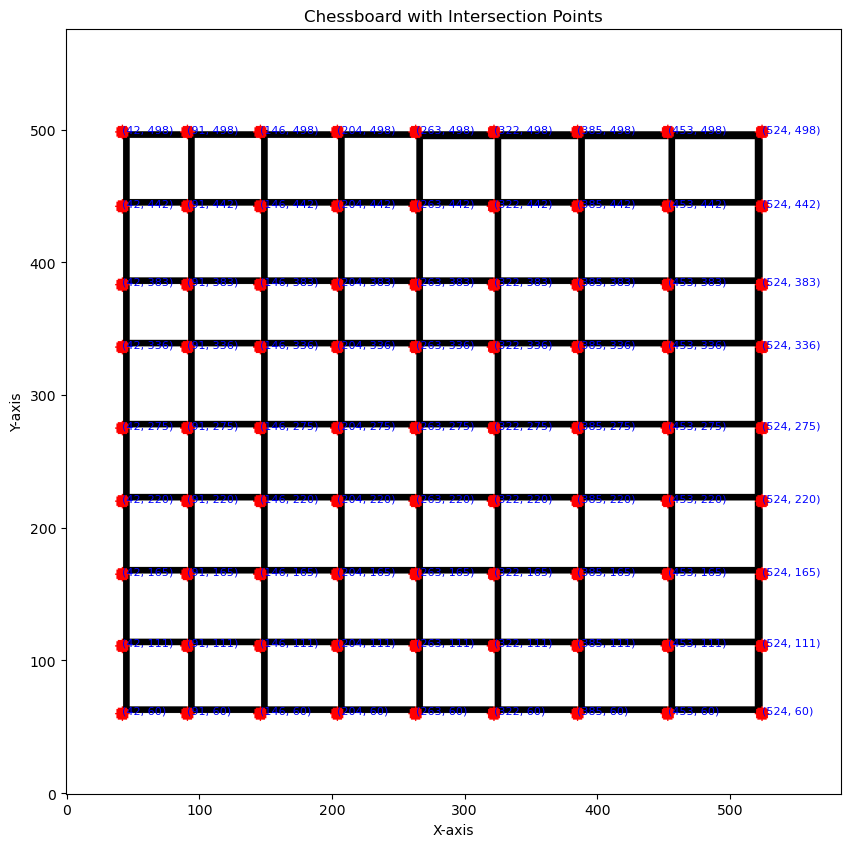

In [68]:
# Load the chessboard image
image = cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\chess.png')
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply edge detection using Canny
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Use Hough Line Transform with finer resolution and lower threshold
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Filter out close lines
def filter_close_lines(lines, rho_threshold=15, theta_threshold=np.pi/90):
    filtered_lines = []
    for current_line in lines:
        rho, theta = current_line[0]
        too_close = False
        for previous_line in filtered_lines:
            prev_rho, prev_theta = previous_line[0]
            if abs(rho - prev_rho) < rho_threshold and abs(theta - prev_theta) < theta_threshold:
                too_close = True
                break
        if not too_close:
            filtered_lines.append(current_line)
    return filtered_lines

# Apply the filter
if lines is not None:
    lines = filter_close_lines(lines)

# Sort the lines into horizontal and vertical lines
horizontal_lines = []
vertical_lines = []

for line in lines:
    rho, theta = line[0]
    if np.pi / 2 - 0.1 <= theta <= np.pi / 2 + 0.1:  # Vertical lines
        vertical_lines.append(line)
    elif theta <= 0.1 or theta >= np.pi - 0.1:  # Horizontal lines
        horizontal_lines.append(line)

# Sort by rho to order the lines
vertical_lines = sorted(vertical_lines, key=lambda x: x[0][0])
horizontal_lines = sorted(horizontal_lines, key=lambda x: x[0][0])

# Function to find the intersection point of two lines
def find_intersection(line1, line2):
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([rho1, rho2])
    x, y = np.linalg.solve(A, b)
    return int(np.round(x)), int(np.round(y))

# Find the intersection points
intersection_points = []
for h_line in horizontal_lines:
    row = []
    for v_line in vertical_lines:
        x, y = find_intersection(h_line, v_line)
        row.append((x, y))
    intersection_points.append(row)

# Draw the intersection points on the image
image_with_intersections = image.copy()
for row in intersection_points:
    for point in row:
        cv2.circle(image_with_intersections, point, 5, (0, 0, 255), -1)

# Display the chessboard with intersection points and axes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_intersections, cv2.COLOR_BGR2RGB))
plt.title('Chessboard with Intersection Points')

# Display X and Y axes with coordinates
for row in intersection_points:
    for point in row:
        plt.text(point[0], point[1], f"({point[0]}, {point[1]})", color="blue", fontsize=8)

print(intersection_points)

# Set labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Invert the Y-axis so it starts from the bottom
plt.gca().invert_yaxis()

# Show the grid and plot
plt.grid(False)
plt.show()


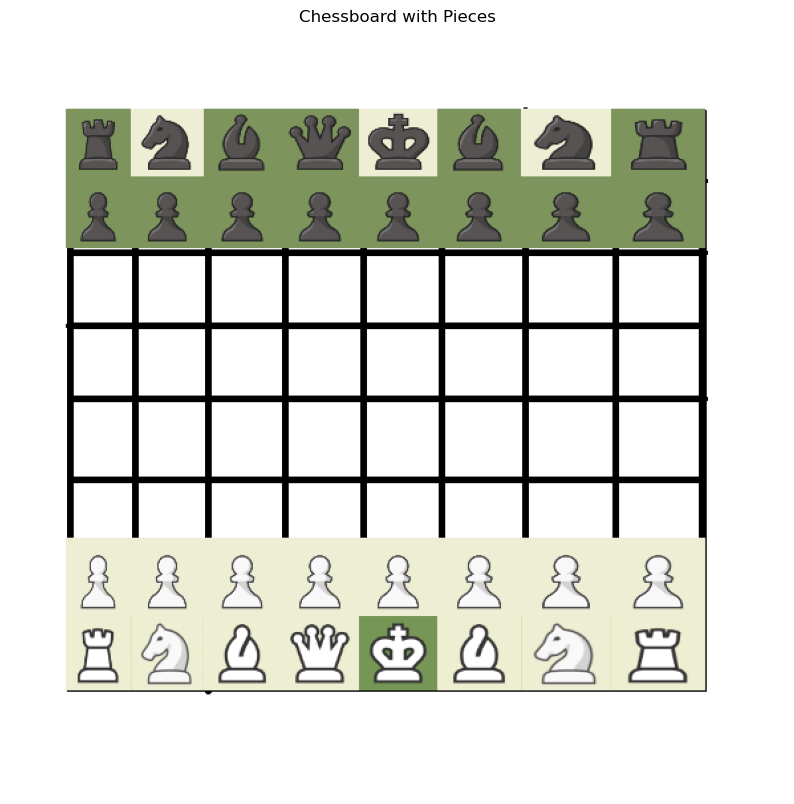

In [90]:
chess_positions = {'black_rook.1': (0, 0),'black_rook.2': (7, 0), 'black_knight.1': (1, 0),'black_knight.2': (6, 0), 'black_bishop.1': (2, 0),'black_bishop.2': (5, 0), 'black_queen': (3, 0),'black_king': (4, 0),
                  "black_pawn":(0,1),"black_pawn.1":(1,1),"black_pawn.2":(2,1),"black_pawn.3":(3,1),"black_pawn.4":(4,1),"black_pawn.5":(5,1),"black_pawn.6":(6,1),"black_pawn.7":(7,1),
                  'white_rook.1': (0, 7), 'white_rook.2': (7, 7), 
    'white_knight.1': (1, 7), 'white_knight.2': (6, 7),
    'white_bishop.1': (2, 7), 'white_bishop.2': (5, 7), 
    'white_queen': (3, 7), 'white_king': (4, 7),
    'white_pawn': (0, 6), 'white_pawn.1': (1, 6), 'white_pawn.2': (2, 6), 
    'white_pawn.3': (3, 6), 'white_pawn.4': (4, 6), 
    'white_pawn.5': (5, 6), 'white_pawn.6': (6, 6), 'white_pawn.7': (7, 6)}

# Load the chessboard image
image = cv2.imread(r'C:\Users\samee\Desktop\University\FAST\Semester 9\CV\Assignments\Ass1\Question 2 images\chess.png')
image_with_pieces = image.copy()

for piece, (row, col) in chess_positions.items():
    # Strip off any suffix (_1, _2) to get the piece type
    base_piece = piece.split('.')[0]
    
    # Get the top-left and bottom-right corner coordinates for the square
    top_left = intersection_points[row][col]
    bottom_right = intersection_points[row + 1][col + 1]
    
    # Calculate the width and height of the square
    square_width = bottom_right[0] - top_left[0]
    square_height = bottom_right[1] - top_left[1]
    
    # Resize the chess piece to fit the square
    resized_piece = cv2.resize(chess_pieces[base_piece], (square_width, square_height))
    
    # Place the resized piece on the board
    image_with_pieces[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = resized_piece

    
cv2.imwrite("chess_with_pieces.jpg",image_with_pieces)
# Display the final chessboard with pieces
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_pieces, cv2.COLOR_BGR2RGB))
plt.title('Chessboard with Pieces')
plt.axis('off')
plt.show()


## Part D

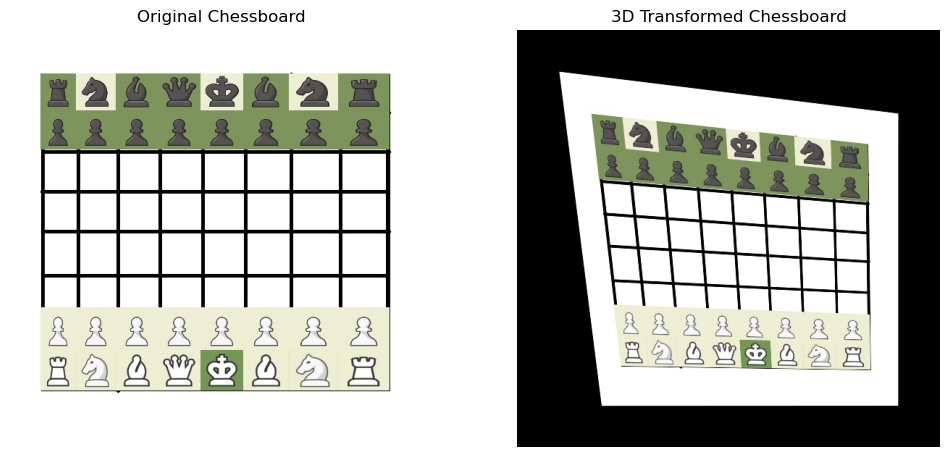

In [2]:
# Load the chessboard image
image = cv2.imread("chess_with_pieces.jpg")

# Get the dimensions of the image
height, width = image.shape[:2]

# Define the original corner points of the chessboard (Assuming a perfect chessboard grid)
# Top-left, top-right, bottom-right, bottom-left
original_points = np.float32([
    [0, 0],
    [width - 1, 0],
    [width - 1, height - 1],
    [0, height - 1]
])

# Define new points to simulate 3D perspective (modify these points to change the 3D effect)
# This is where the transformation happens; adjust these values to make it look more 3D
new_points = np.float32([
    [width * 0.1, height * 0.1],     # Top-left corner moves down and right
    [width * 0.9, height * 0.2],     # Top-right corner moves down slightly
    [width * 0.9, height * 0.9],     # Bottom-right stays almost the same
    [width * 0.2, height * 0.9]      # Bottom-left corner moves inwards
])

# Get the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(original_points, new_points)

# Apply the perspective warp to the image
transformed_image = cv2.warpPerspective(image, matrix, (width, height))

# Display the original and transformed images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Chessboard')
plt.axis('off')

# Transformed Image (3D effect)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('3D Transformed Chessboard')
plt.axis('off')

plt.show()


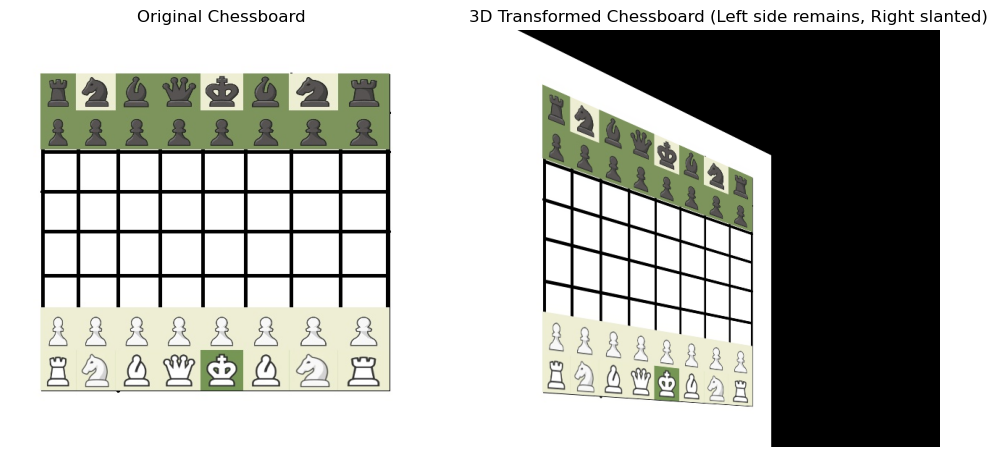

In [11]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the chessboard image with pieces
image = cv2.imread("chess_with_pieces.jpg")

# Get the dimensions of the image
height, width = image.shape[:2]

# Define the original corner points of the chessboard (Assuming a perfect chessboard grid)
# Top-left, top-right, bottom-right, bottom-left
original_points = np.float32([
    [0, 0],
    [width - 1, 0],
    [width - 1, height - 1],
    [0, height - 1]
])

# Define new points to simulate the 3D perspective, where the right side shrinks/slants down
new_points = np.float32([
    [0, 0],                          # Top-left remains the same
    [width * 0.6, height * 0.3],      # Top-right moves down and left to make it appear smaller
    [width * 0.6, height-1],      # Bottom-right moves up and left to make it slanted
    [0, height - 1]                   # Bottom-left remains the same
])

# Get the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(original_points, new_points)

# Apply the perspective warp to the image
transformed_image = cv2.warpPerspective(image, matrix, (width, height))

# Display the original and transformed images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Chessboard')
plt.axis('off')

# Transformed Image (3D effect)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('3D Transformed Chessboard (Left side remains, Right slanted)')
plt.axis('off')

plt.show()


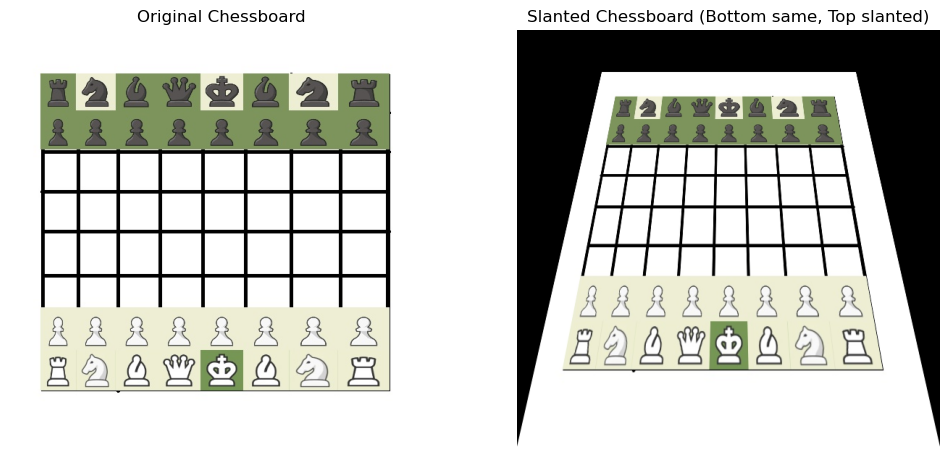

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the chessboard image with pieces
image = cv2.imread("chess_with_pieces.jpg")

# Get the dimensions of the image
height, width = image.shape[:2]

# Define the original corner points of the chessboard (Assuming a perfect chessboard grid)
# Top-left, top-right, bottom-right, bottom-left
original_points = np.float32([
    [0, 0],
    [width - 1, 0],
    [width - 1, height - 1],
    [0, height - 1]
])

# Define new points to simulate a slanted effect where the top points are slanted and bottom remains the same
new_points = np.float32([
    [width * 0.2, height * 0.1],      # Top-left slants down and to the right
    [width * 0.8, height * 0.1],      # Top-right slants down and to the left
    [width - 1, height - 1],          # Bottom-right stays the same
    [0, height - 1]                   # Bottom-left stays the same
])

# Get the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(original_points, new_points)

# Apply the perspective warp to the image
transformed_image = cv2.warpPerspective(image, matrix, (width, height))

# Display the original and transformed images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Chessboard')
plt.axis('off')

# Transformed Image (3D effect)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Slanted Chessboard (Bottom same, Top slanted)')
plt.axis('off')

plt.show()
